#### Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 


#### Loading Dataset

In [29]:
df = pd.read_csv('DisneylandReviews.csv', encoding ='Latin')
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [31]:
df.describe()

,Review_ID,Rating
count,4.265600e+04,42656.000000
mean,3.188553e+08,4.217695
std,1.657092e+08,1.063371
min,1.398724e+06,1.000000
25%,1.743274e+08,4.000000
50%,2.907583e+08,5.000000
75%,4.489579e+08,5.000000
max,6.708014e+08,5.000000


In [32]:
df.shape

(42656, 6)

#### Dropping Review Column as it is not giving any insight

In [33]:
df.drop("Review_ID", axis = 1, inplace = True)

### Changing "missing" to "null" in Year_month Column

In [34]:
df.replace("missing", pd.NA, inplace=True)

In [35]:
df.columns[df.isnull().any()]


Index(['Year_Month'], dtype='object')

In [36]:
df.isna().sum()

Rating                  0
Year_Month           2613
Reviewer_Location       0
Review_Text             0
Branch                  0
dtype: int64

### Dropping Nulls in dataset

In [37]:
df = df.dropna()
df

,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...
42113,4,2011-1,United Kingdom,Although our pick up was prompt the taxi drive...,Disneyland_Paris
42114,4,2011-1,Germany,Just returned from a 4 days family trip to Dis...,Disneyland_Paris
42115,1,2010-12,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Disneyland_Paris
42116,2,2010-12,United Kingdom,Well I was really looking forward to this trip...,Disneyland_Paris


### Checking duplicates

In [38]:
df.duplicated().sum()

17

### Dropping Duplicates

In [39]:
df = df.drop_duplicates()

In [40]:
df


,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...
42113,4,2011-1,United Kingdom,Although our pick up was prompt the taxi drive...,Disneyland_Paris
42114,4,2011-1,Germany,Just returned from a 4 days family trip to Dis...,Disneyland_Paris
42115,1,2010-12,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Disneyland_Paris
42116,2,2010-12,United Kingdom,Well I was really looking forward to this trip...,Disneyland_Paris


### Date Time Manipulation

In [41]:
df.Year_Month=df.Year_Month.apply(pd.to_datetime, errors ='coerce')

df["month"]=df.Year_Month.dt.month
df["year"]=df.Year_Month.dt.year

df.drop("Year_Month", axis=1, inplace=True)

In [42]:
df

,Rating,Reviewer_Location,Review_Text,Branch,month,year
0,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,4,2019
1,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,5,2019
2,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,4,2019
3,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,4,2019
4,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,4,2019
...,...,...,...,...,...,...
42113,4,United Kingdom,Although our pick up was prompt the taxi drive...,Disneyland_Paris,1,2011
42114,4,Germany,Just returned from a 4 days family trip to Dis...,Disneyland_Paris,1,2011
42115,1,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Disneyland_Paris,12,2010
42116,2,United Kingdom,Well I was really looking forward to this trip...,Disneyland_Paris,12,2010


## Text Preprocessing

In [43]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

#### Converting to Lowercase

In [44]:
df["Review_Text"] = df["Review_Text"].apply(lambda x: " ".join(x.lower() for x in x.split()))


#### Removing numerical values

In [45]:
df["Review_Text"] = df["Review_Text"].str.replace("\d","")


#### Removing Punctuations

In [46]:
df["Review_Text"] = df["Review_Text"].str.replace("[^\w\s]","")


### StopWords

In [47]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["Review_Text"] = df["Review_Text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rbaud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Lemmatization

In [48]:
from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")
df["Review_Text"] = df["Review_Text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rbaud\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rbaud\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Word Tokenization

In [49]:
from nltk.tokenize import word_tokenize
df["tokens"] = df["Review_Text"].apply(lambda x: TextBlob(x).words)

### Frequency Analysis

In [50]:
df["frequency"] = df["Review_Text"].apply(lambda x: len(str(x).split(" "))) 


In [52]:
df.groupby("frequency").max()
df[df["Review_Text"].str.contains("visited disneyland paris least")]
longest_comment=df.iloc[40025,2]

#### Print Longest Comment

In [53]:
longest_comment_tags=TextBlob(longest_comment).tags


In [54]:
df.head()


,Rating,Reviewer_Location,Review_Text,Branch,month,year,tokens,frequency
0,4,Australia,ever disneyland anywhere find disneyland hong ...,Disneyland_HongKong,4,2019,"[ever, disneyland, anywhere, find, disneyland,...",32
1,4,Philippines,"since last time visit hk disneyland .. yet, ti...",Disneyland_HongKong,5,2019,"[since, last, time, visit, hk, disneyland, yet...",116
2,4,United Arab Emirates,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong,4,2019,"[thanks, god, hot, humid, visiting, park, othe...",86
3,4,Australia,hk disneyland great compact park. unfortunatel...,Disneyland_HongKong,4,2019,"[hk, disneyland, great, compact, park, unfortu...",49
4,4,United Kingdom,"location city, took around 1 hour kowlon, kids...",Disneyland_HongKong,4,2019,"[location, city, took, around, 1, hour, kowlon...",18


## Data Visualisation

In [55]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

#### We need convert all reviews to single text

In [56]:
text = " ".join(i for i in df.Review_Text)


#### Creating a WordCloud

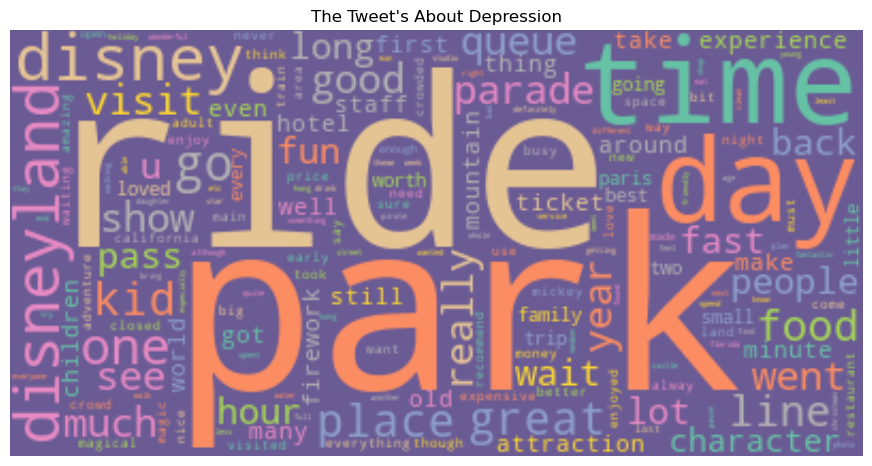

In [57]:
wordcloud = WordCloud(
    background_color="#6B5B95",
    colormap="Set2",
    collocations=False).generate(text)

plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The Tweet's About Depression")
plt.show()

#### Most Common Words

In [58]:
print("\n",
      "\n",text.count("disney"),
      "\n",text.count("park"),
      "\n",text.count("ride"),
      "\n",text.count("day"),
      "\n",text.count("time"),
      "\n",text.count("disneyland"),
      "\n",text.count("great"),
      "\n",text.count("really"),
      "\n",text.count("children"),
      "\n",text.count("minute"),
     )


 
 66975 
 52993 
 50040 
 45060 
 38108 
 31119 
 15549 
 11367 
 7851 
 7730


In [59]:
data = {
    "title": ["disney", "park" ,"ride", "day", "time", "disneyland", 
              "great","really","children", "minute"],
    "count": [73168, 57501, 54146, 48963, 41484, 33951, 16969, 12447, 8619, 8461],
}


In [60]:
data = pd.DataFrame(data)
data.head(10)

,title,count
0,disney,73168
1,park,57501
2,ride,54146
3,day,48963
4,time,41484
5,disneyland,33951
6,great,16969
7,really,12447
8,children,8619
9,minute,8461


#### Creating the barplot

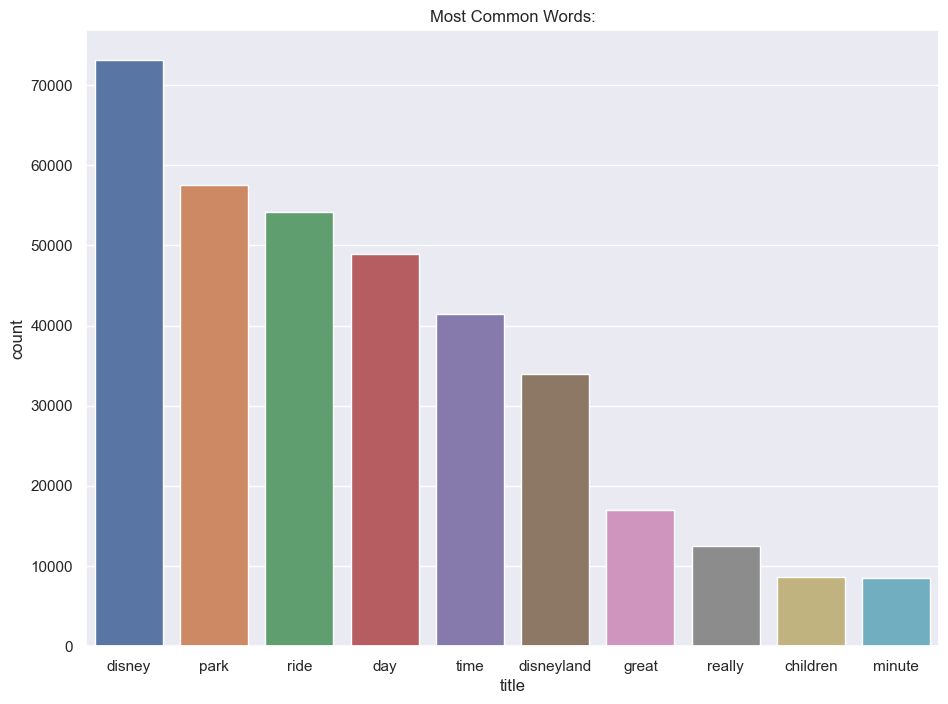

In [85]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(data=data, x="title", y="count").set(title="Most Common Words:");

#### Creating the pie chart

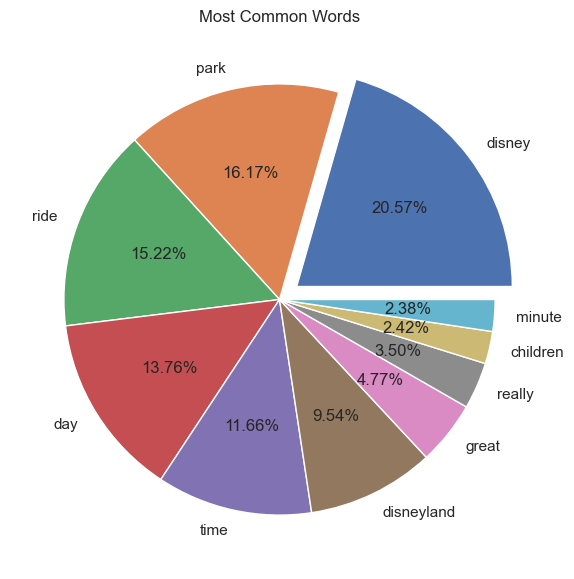

In [62]:
fig = plt.figure(figsize =(10, 7))
myexplode = [0.1, 0, 0, 0,0,0,0,0,0,0] 
plt.pie(data["count"], labels = data["title"], autopct='%1.2f%%', explode=myexplode)
plt.title("Most Common Words")

plt.show()

#### Review Rating

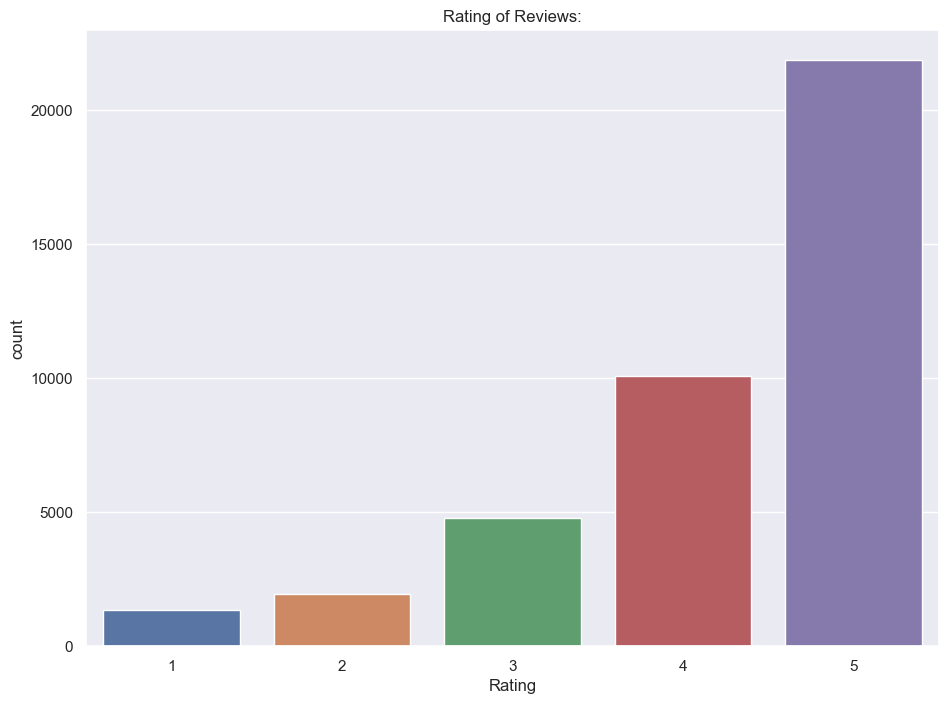

In [63]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data=df, x="Rating").set(title="Rating of Reviews:");

#### Branch Amount

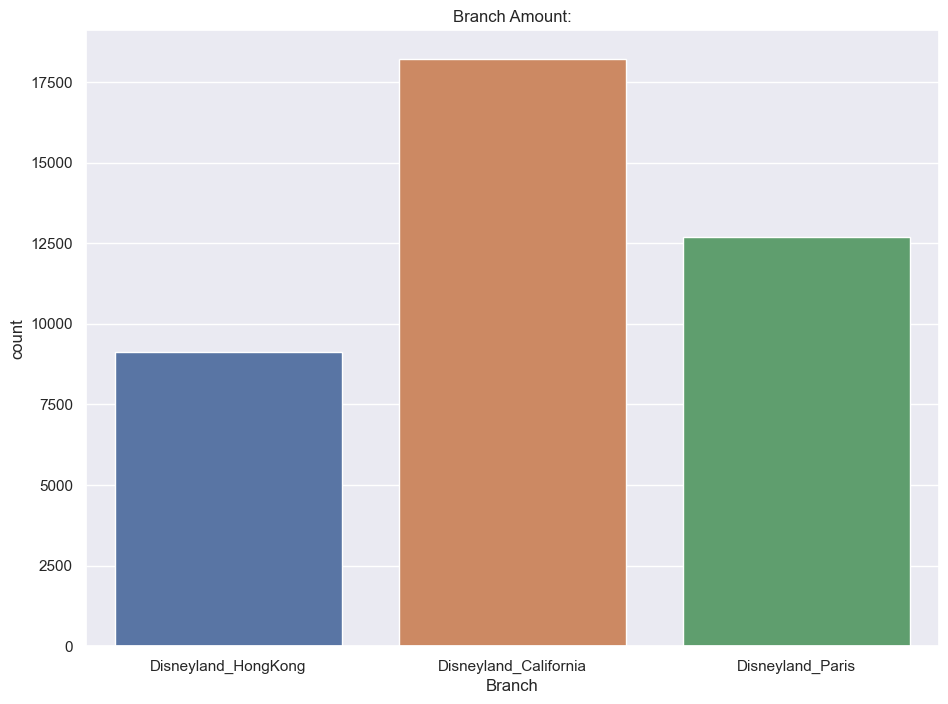

In [64]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data=df, x="Branch").set(title="Branch Amount:");

#### Month Amount

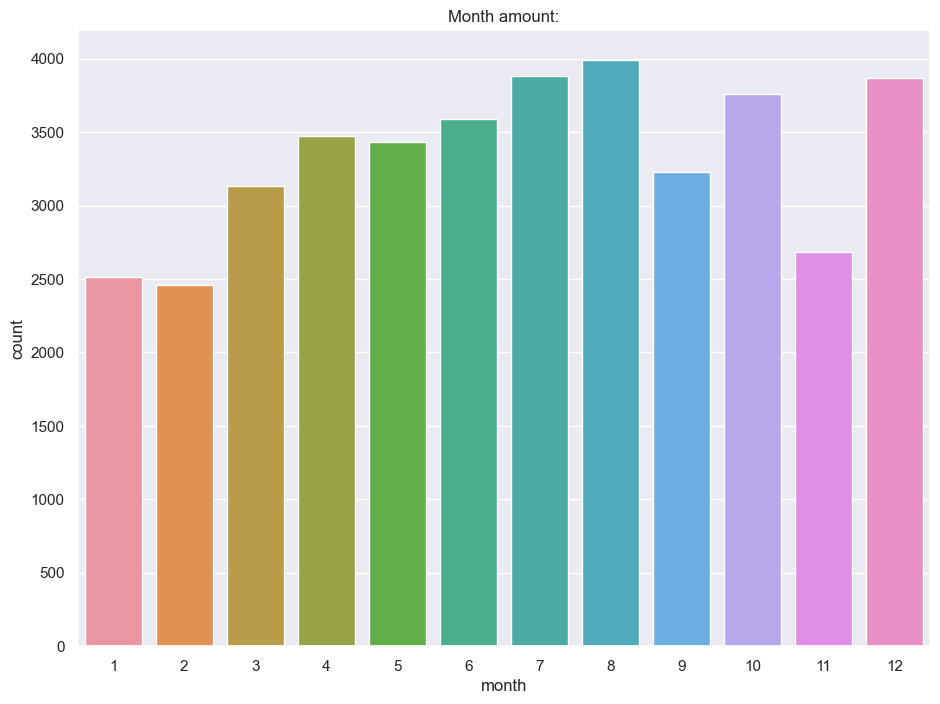

In [65]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data=df, x="month").set(title="Month amount:");

#### Year Amount

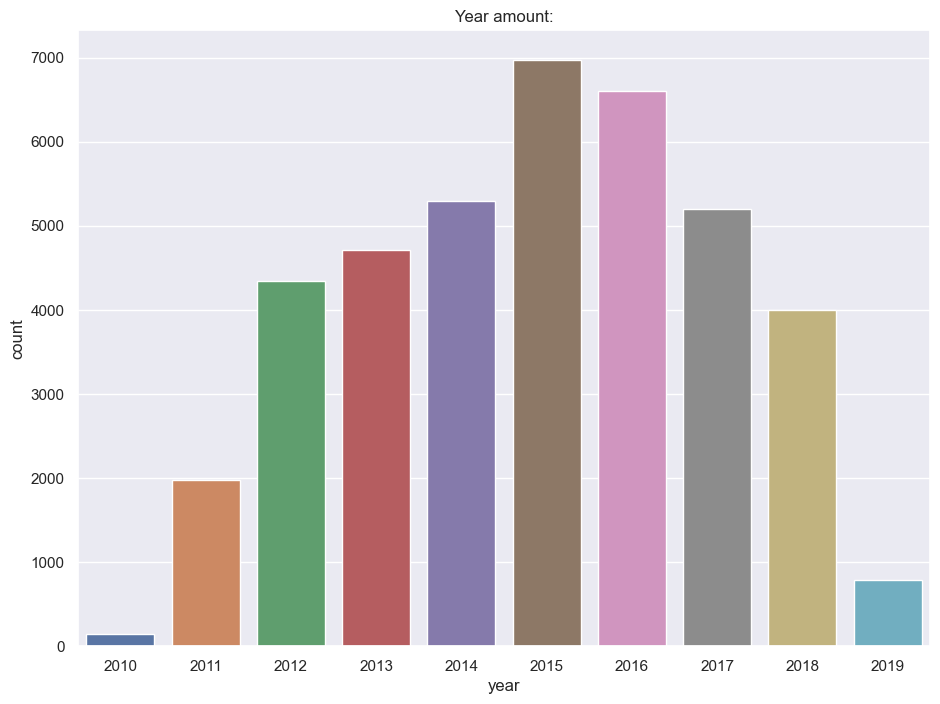

In [66]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data=df, x="year").set(title="Year amount:");

#### Rating Per Branch

<Figure size 1100x800 with 0 Axes>

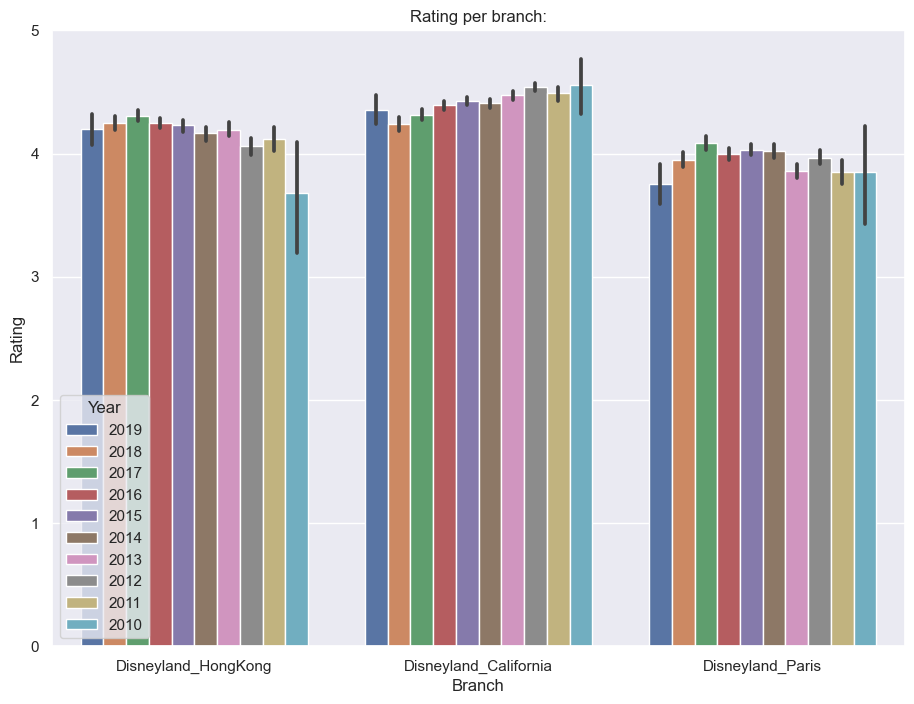

In [67]:
df['year'] = df['year'].astype(str)  # Convert to string type if needed

sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale=0.5, rc={"grid.linewidth": 0.6})
sns.set(rc={'figure.figsize': (11, 8)})

# Use plt.figure to create the figure and ax for more control
plt.figure(figsize=(11, 8))
ax = sns.barplot(data=df, x="Branch", y="Rating", hue="year")
ax.set_title("Rating per branch:")
plt.legend(title='Year')  # Add a legend with a title for the 'year' hue
plt.show()

#### Rating of Branch per month

<Figure size 1100x800 with 0 Axes>

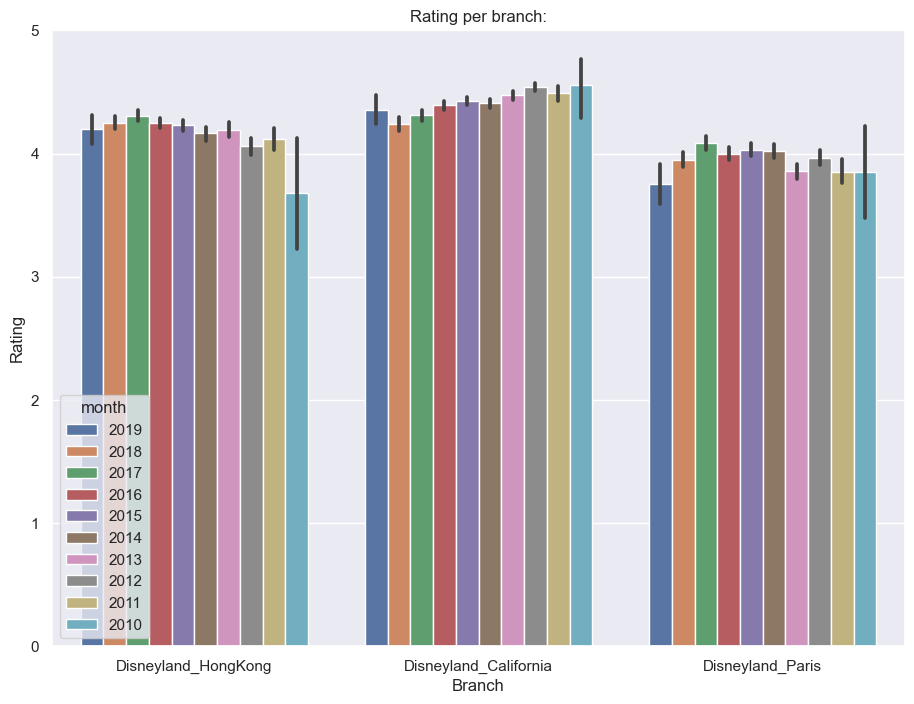

In [68]:
df['month'] = df['month'].astype(str)  # Convert to string type if needed

sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale=0.5, rc={"grid.linewidth": 0.6})
sns.set(rc={'figure.figsize': (11, 8)})

# Use plt.figure to create the figure and ax for more control
plt.figure(figsize=(11, 8))
ax = sns.barplot(data=df, x="Branch", y="Rating", hue="year")
ax.set_title("Rating per branch:")
plt.legend(title='month')  # Add a legend with a title for the 'year' hue
plt.show()

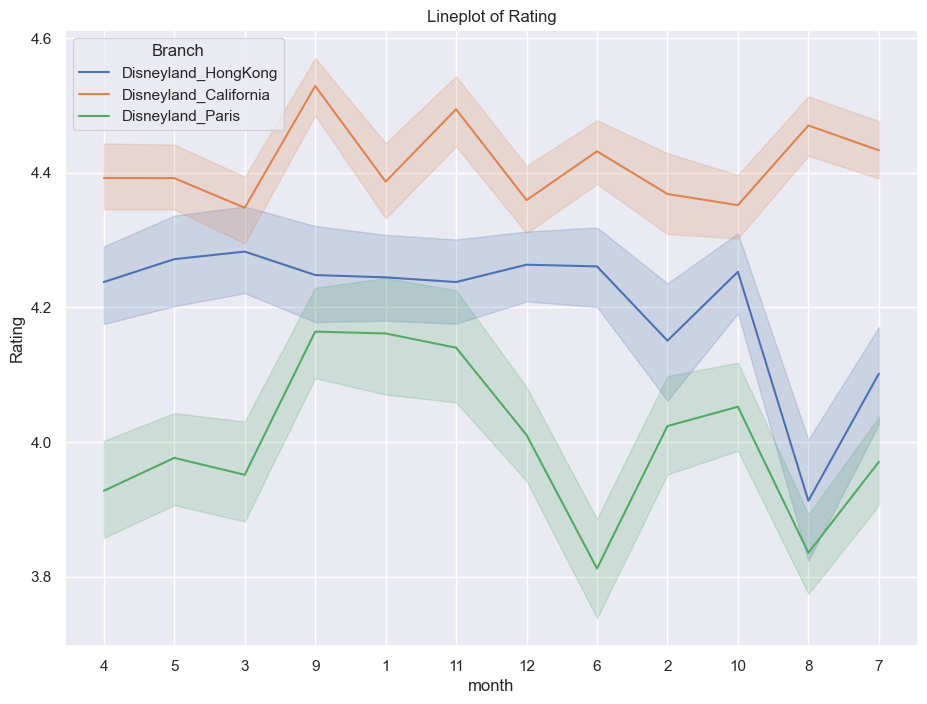

In [69]:
df = df.dropna(subset=["Rating"])  # Remove rows with NaN values in the "Rating" column

# Plotting the data
sns.lineplot(data=df, x="month", y="Rating", hue="Branch")
plt.title("Lineplot of Rating")
plt.show()

#### Lineplot of rating

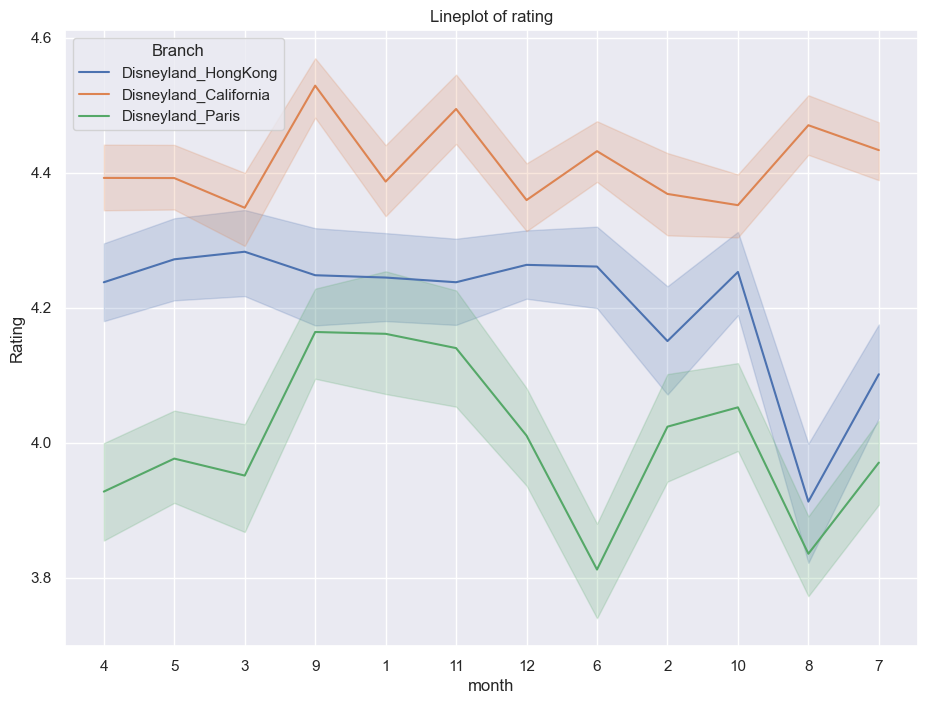

In [70]:
sns.lineplot(data=df, x="month", y="Rating", hue="Branch").set(title="Lineplot of rating");

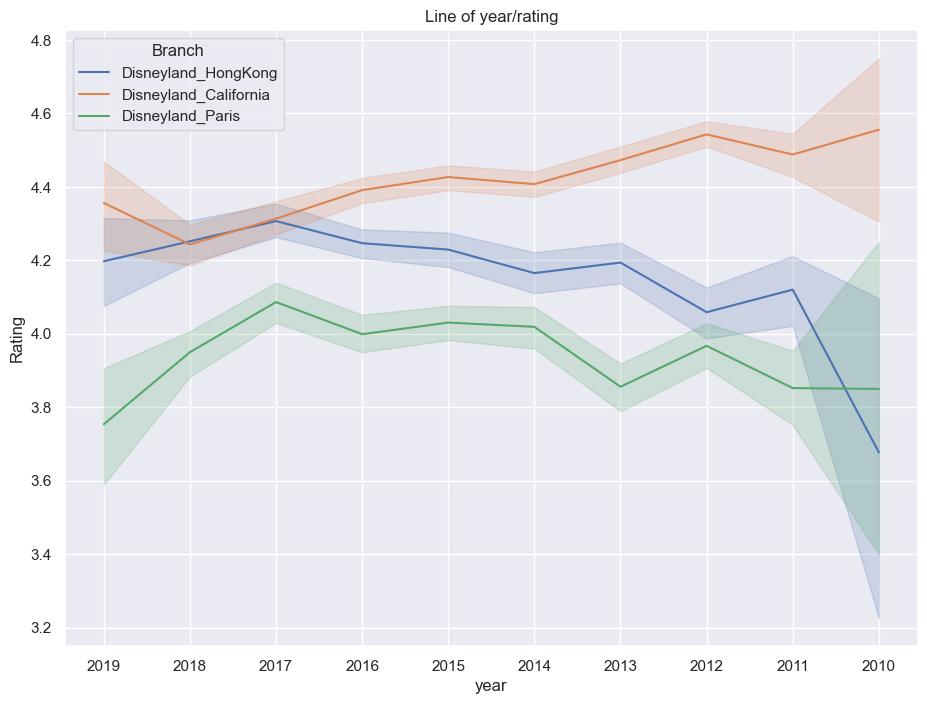

In [71]:
sns.lineplot(data=df, x="year", y="Rating", hue="Branch").set(title="Line of year/rating");


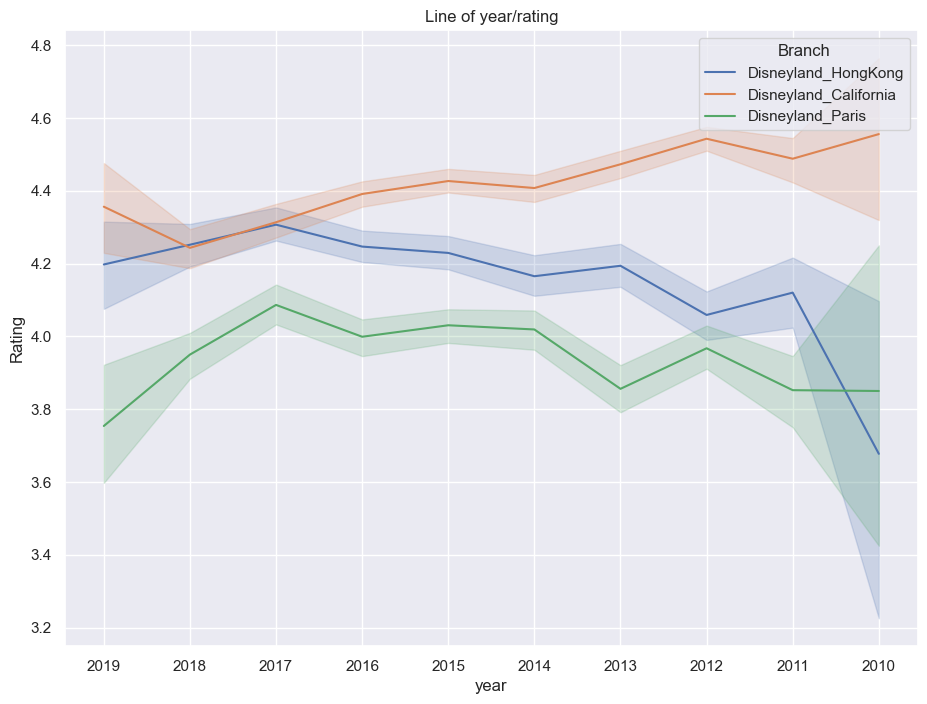

In [72]:
sns.lineplot(data=df, x="year", y="Rating", hue="Branch").set(title="Line of year/rating");

## Sentiment Analysis Using TextBlob

In [73]:
from textblob import TextBlob


In [74]:
blob_emptyline2 = []

for i in df["Review_Text"]:
    blob = TextBlob(i).sentiment
    blob_emptyline2.append(blob)

In [75]:
df_blob2 = pd.DataFrame(blob_emptyline2)


In [76]:
df_blob3 = pd.concat([df.reset_index(drop=True), df_blob2], axis=1)
df_blob3.head()

,Rating,Reviewer_Location,Review_Text,Branch,month,year,tokens,frequency,polarity,subjectivity
0,4,Australia,ever disneyland anywhere find disneyland hong ...,Disneyland_HongKong,4,2019,"[ever, disneyland, anywhere, find, disneyland,...",32,0.231481,0.531481
1,4,Philippines,"since last time visit hk disneyland .. yet, ti...",Disneyland_HongKong,5,2019,"[since, last, time, visit, hk, disneyland, yet...",116,0.199099,0.383889
2,4,United Arab Emirates,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong,4,2019,"[thanks, god, hot, humid, visiting, park, othe...",86,0.226548,0.410238
3,4,Australia,hk disneyland great compact park. unfortunatel...,Disneyland_HongKong,4,2019,"[hk, disneyland, great, compact, park, unfortu...",49,0.222222,0.505556
4,4,United Kingdom,"location city, took around 1 hour kowlon, kids...",Disneyland_HongKong,4,2019,"[location, city, took, around, 1, hour, kowlon...",18,0.266667,0.437500


In [77]:
df_blob3["Sentiment"] =  np.where(df_blob3["polarity"] >= 0 , "Positive", "Negative")


In [78]:
df_blob3.head()


,Rating,Reviewer_Location,Review_Text,Branch,month,year,tokens,frequency,polarity,subjectivity,Sentiment
0,4,Australia,ever disneyland anywhere find disneyland hong ...,Disneyland_HongKong,4,2019,"[ever, disneyland, anywhere, find, disneyland,...",32,0.231481,0.531481,Positive
1,4,Philippines,"since last time visit hk disneyland .. yet, ti...",Disneyland_HongKong,5,2019,"[since, last, time, visit, hk, disneyland, yet...",116,0.199099,0.383889,Positive
2,4,United Arab Emirates,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong,4,2019,"[thanks, god, hot, humid, visiting, park, othe...",86,0.226548,0.410238,Positive
3,4,Australia,hk disneyland great compact park. unfortunatel...,Disneyland_HongKong,4,2019,"[hk, disneyland, great, compact, park, unfortu...",49,0.222222,0.505556,Positive
4,4,United Kingdom,"location city, took around 1 hour kowlon, kids...",Disneyland_HongKong,4,2019,"[location, city, took, around, 1, hour, kowlon...",18,0.266667,0.437500,Positive


## Result

In [79]:
result = df_blob3["Sentiment"].value_counts()


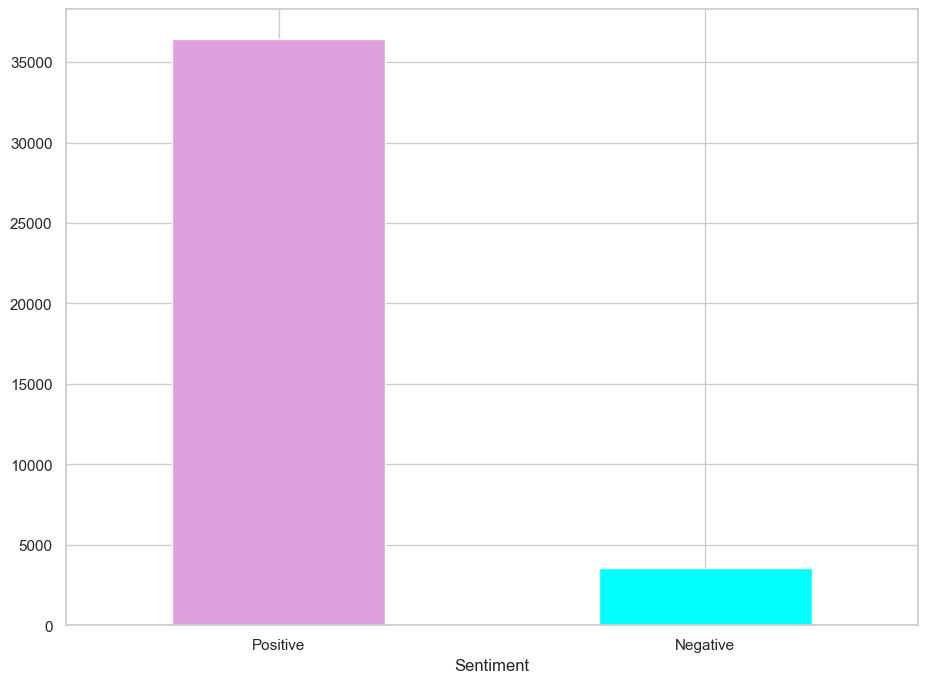

In [80]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0, color=["plum","cyan"]);

In [81]:
df_blob3.groupby("Sentiment").count()


,Rating,Reviewer_Location,Review_Text,Branch,month,year,tokens,frequency,polarity,subjectivity
Sentiment,,,,,,,,,,
Negative,3562,3562,3562,3562,3562,3562,3562,3562,3562,3562
Positive,36464,36464,36464,36464,36464,36464,36464,36464,36464,36464


In [82]:
df_blob3.groupby("polarity").max()


,Rating,Reviewer_Location,Review_Text,Branch,month,year,tokens,frequency,subjectivity,Sentiment
polarity,,,,,,,,,,
-1.000000,5,United Kingdom,visited rainy satarday hope lines would shorte...,Disneyland_Paris,7,2018,"[visited, rainy, satarday, hope, lines, would,...",20,1.000000,Negative
-0.976562,2,Belgium,use go every year disneyland paris. quality se...,Disneyland_Paris,5,2016,"[use, go, every, year, disneyland, paris, qual...",11,0.700000,Negative
-0.875000,5,Canada,"honestly, bad thing say park? set bar places t...",Disneyland_California,12,2012,"[honestly, bad, thing, say, park, set, bar, pl...",12,0.666667,Negative
-0.800000,5,Canada,food boring dine go place serves soup sandwhic...,Disneyland_California,3,2012,"[food, boring, dine, go, place, serves, soup, ...",13,0.975000,Negative
-0.750000,5,United States,"like disneyland? must visit theme park, disapp...",Disneyland_Paris,7,2017,"[like, disneyland, must, visit, theme, park, d...",25,0.750000,Negative
...,...,...,...,...,...,...,...,...,...,...
0.950000,5,United Kingdom,really brilliant place feel like child again! ...,Disneyland_Paris,10,2012,"[really, brilliant, place, feel, like, child, ...",13,1.000000,Positive
0.960000,5,United States,say said disneyland best care anyone says ages...,Disneyland_California,3,2016,"[say, said, disneyland, best, care, anyone, sa...",22,0.530000,Positive
0.976562,5,United States,please realize park 60% orlando yet 18 million...,Disneyland_Paris,8,2019,"[please, realize, park, 60, orlando, yet, 18, ...",23,1.000000,Positive


In [83]:
df[df["Review_Text"].str.contains("years years come always")]
positive_comment=df.iloc[19672,2]
print(positive_comment)

spouse visited disneyland 30 years ago opportunity revisit 2014. since first visit opportunity visit tokyo orlando disney facilities.the anaheim park reasonable experience, think disney organization better cleanliness things well parks.i realize park small, lot seen day day operation tokyo orlando seem carried first walt disney theme park.


In [84]:
df[df["Review_Text"].str.contains("one gets bit boring")]
negative_comment=df.iloc[10544,2]
print(negative_comment)

british gnarly old cynic, sure 3 days disney. especially mega disappointing universal studios visit. however... fantastic! see rather hoovering money, spent keeping entertained throughout day place clean tidy. parades, especially night incredible. lucky enough pixar fest cannot take one go. stay fireworks make use fastpass rides thing. also, park hopper option makes sense, especially day. food good varied. especially cheap, comparable restaurant prices. go peak possible. even april, busy hot.
